In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/pic2"
!unzip "data.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/truck/0000.jpg    
  inflating: train/truck/0001.jpg    
  inflating: train/truck/0002.jpg    
  inflating: train/truck/0003.jpg    
  inflating: train/truck/0004.jpg    
  inflating: train/truck/0005.jpg    
  inflating: train/truck/0006.jpg    
  inflating: train/truck/0007.jpg    
  inflating: train/truck/0008.jpg    
  inflating: train/truck/0009.jpg    
  inflating: train/truck/0010.jpg    
  inflating: train/truck/0011.jpg    
  inflating: train/truck/0012.jpg    
  inflating: train/truck/0013.jpg    
  inflating: train/truck/0014.jpg    
  inflating: train/truck/0015.jpg    
  inflating: train/truck/0016.jpg    
  inflating: train/truck/0017.jpg    
  inflating: train/truck/0018.jpg    
  inflating: train/truck/0019.jpg    
  inflating: train/truck/0020.jpg    
  inflating: train/truck/0021.jpg    
  inflating: train/truck/0022.jpg    
  inflating: train/truck/0023.jpg    
  inflating: train/truck/0024.jpg    
  inflating: t

In [3]:
## DACON에서 대회 준비중인 수정전 파일입니다.
import tensorflow as tf
import os
import numpy as np
import PIL

from PIL import Image
from glob import glob

In [14]:
root = 'train/'
training_images = []
training_labels = []

for filename in glob(root +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        training_images.append(img_array)
        label = filename.split('/')[1]
        training_labels.append(label)
  
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [16]:
root2 = 'test/'
test_images = []
test_idx = []

flist = sorted(glob(root2 + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename)
    img_array = np.array(an_img) 
    test_images.append(img_array) 
    label = filename.split('/')[1] 
    test_idx.append(label)
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])


(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],

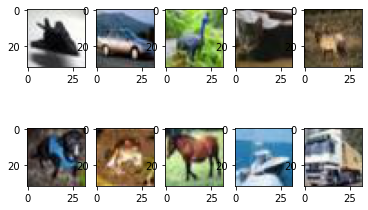

In [17]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i*5000])
    print(training_labels[i*5000], end=",")
plt.show()

In [18]:
print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [19]:
X_train = training_images / 255.0
X_test = test_images/255.0

In [20]:
index = np.arange(X_train.shape[0])
np.random.shuffle(index)
features = X_train[index]
label = training_labels[index]

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), 
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), 
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), 
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), 
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), 
    
    tf.keras.layers.GlobalAveragePooling2D(), 

    tf.keras.layers.Dense(256, activation = 'relu'), 
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])

In [22]:
learning_rate = 0.001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 3)

n_iter = 0

for train_index, validataion_index in kfold.split(features):
    X_train , X_valid = features[train_index] , features[validataion_index]
    y_train , y_valid = label[train_index] , label[validataion_index]
    model1 = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, verbose = 2)
    n_iter += 1

Epoch 1/30
261/261 - 39s - loss: 1.5840 - accuracy: 0.4454 - val_loss: 4.8519 - val_accuracy: 0.1189 - 39s/epoch - 150ms/step
Epoch 2/30
261/261 - 25s - loss: 1.0767 - accuracy: 0.6279 - val_loss: 1.4015 - val_accuracy: 0.5171 - 25s/epoch - 94ms/step
Epoch 3/30
261/261 - 25s - loss: 0.8425 - accuracy: 0.7163 - val_loss: 0.8998 - val_accuracy: 0.6960 - 25s/epoch - 94ms/step
Epoch 4/30
261/261 - 24s - loss: 0.6942 - accuracy: 0.7699 - val_loss: 0.9305 - val_accuracy: 0.6961 - 24s/epoch - 94ms/step
Epoch 5/30
261/261 - 24s - loss: 0.5747 - accuracy: 0.8070 - val_loss: 0.9563 - val_accuracy: 0.7028 - 24s/epoch - 94ms/step
Epoch 6/30
261/261 - 26s - loss: 0.4721 - accuracy: 0.8408 - val_loss: 0.8760 - val_accuracy: 0.7261 - 26s/epoch - 101ms/step
Epoch 7/30
261/261 - 26s - loss: 0.3780 - accuracy: 0.8734 - val_loss: 0.9584 - val_accuracy: 0.7233 - 26s/epoch - 101ms/step
Epoch 8/30
261/261 - 24s - loss: 0.3014 - accuracy: 0.9000 - val_loss: 0.8143 - val_accuracy: 0.7626 - 24s/epoch - 94ms/st

In [24]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['horse', 'bird', 'airplane', 'bird', 'airplane'], dtype='<U10')

In [26]:
import pandas as pd

sample_submission = pd.read_csv("/content/drive/MyDrive/pic2/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit.csv",index=False)

In [27]:
sample_submission.head()

,id,target
0,0000.jpg,horse
1,0001.jpg,bird
2,0002.jpg,airplane
3,0003.jpg,bird
4,0004.jpg,airplane
